# Assignment 2

*Salim M'jahad - msm2243*

### Intro to Theoretical Neuroscience

#### **Problem 1**

a) Integrating using Euler

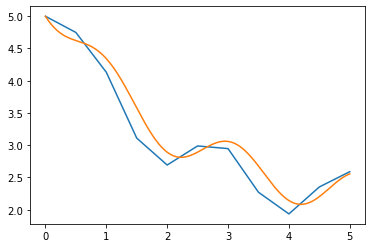

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def diff_x(x, t):
  return -0.5*x + 1 + np.sin(3*t) 

# initial conditions x(0) = 5
# and we have euler integration x(t + delta(t)) = x(t) + delta(t)*dx(t)/dt
def integrate_euler(start, end, step_size):
  steps = int(np.ceil((end-start)/step_size))
  result = np.zeros(steps+1)
  result[0] = 5
  step_range = np.array(range(0, steps+1))
  t_range = step_range*step_size
  for i in step_range[1:]:
    t = t_range[i]
    result[i] = result[i-1] + diff_x(result[i-1], t)*step_size
  return [t_range, result]

rng, res = integrate_euler(0.0, 5.0, 0.5)
plt.plot(rng, res)
rng, res = integrate_euler(0.0, 5.0, 0.01)
plt.plot(rng, res)
plt.show()

b) Integrating using exponential integration scheme 

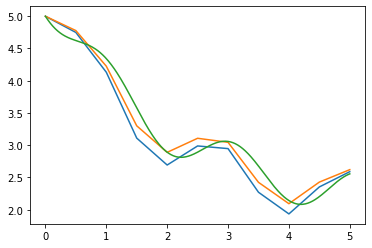

Euler squared error 0.5717565737544987
Exp squared error 0.28193457388216314


In [0]:
def a(t):
  return (1 + np.sin(3*t))*2.0

def integrate_exp(start, end, step_size):
  # tau = 2 from equation
  ss_over_tau = step_size/2.0
  steps = int(np.ceil((end-start)/step_size))
  result = np.zeros(steps+1)
  result[0] = 5
  step_range = np.array(range(0, steps+1))
  t_range = step_range*step_size
  for i in step_range[1:]:
    t = t_range[i]
    result[i] = a(t) + (result[i-1] - a(t))*np.exp(-ss_over_tau)
  return [t_range, result]

rng_euler, res_euler = integrate_euler(0.0, 5.0, 0.5)
plt.plot(rng_euler, res_euler)
rng_exp, res_exp = integrate_exp(0.0, 5.0, 0.5)
plt.plot(rng_exp, res_exp)
rng, res = integrate_euler(0.0, 5.0, 0.01)
plt.plot(rng, res)
plt.show()

idx = [i in rng_exp for i in rng]
print('Euler squared error', ((res_euler-res[idx])**2).sum())
print('Exp squared error', ((res_exp-res[idx])**2).sum())


Blue: euler, delta_t = 0.5
Orange: exp, delta_t = 0.5
Green: euler, delta_t = 0.01

Using green as baseline, we see that Orange (exp) does better than euler with the same time step in approximating green. (Check squared error)



#### **Problem 2**

In [0]:
c_m = 10.0e-3
g_L = 1.0
E_L = -70e-3
g_ex = 0.5
E_ex = 0.0
V_th = -54e-3
V_reset = -80e-3

tau_ex = 10.0e-3

def a(s):
  return (g_L*E_L+g_ex*s*E_ex)/(g_L+g_ex*s)

def tau(s):
  return c_m/(g_L+g_ex*s)

times = [0.1,0.2,0.23,0.3,0.32,0.4,0.41, np.inf]

def integrate_V(start, end, step_size):
  ti = 0
  steps = int(np.ceil((end-start)/step_size))
  V = np.zeros(steps+1)
  s = np.zeros(steps+1)
  V[0] = E_L # start at E_L
  s[0] = 0 # at V_reset 
  step_range = np.array(range(0, steps+1))
  t_range = step_range*step_size
  for i in step_range[1:]:
    t = t_range[i]
    # calc s
    s[i] += s[i-1]*np.exp(-step_size/tau_ex) 
    if t >= times[ti]:
        s[i] += 1
        ti +=1
    tmp_a = a(s[i])
    tmp_tau = tau(s[i])
    V[i] = tmp_a + (V[i-1] - tmp_a)*np.exp(-step_size/tmp_tau)
    if V[i] >= V_th:
      V[i] = V_reset
  I = g_ex*s*(V-E_ex)
  return [t_range, V, I]

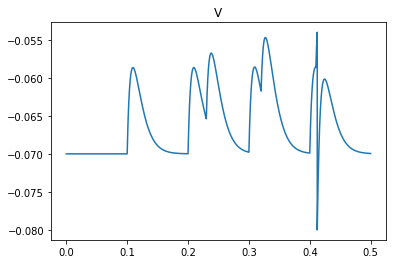

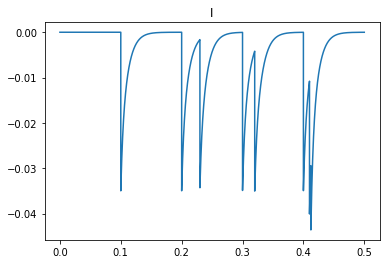

In [0]:
rng, V, I = integrate_V(0.0, 0.5, 0.00001)
plt.plot(rng, V)
plt.title('V')
plt.show()
plt.plot(rng, I)
plt.title('I')
plt.show()

optional more advanced problem 

#### **Problem 2**

a)

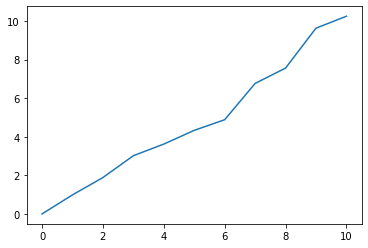

In [0]:
## Doing this in milli-seconds and mV this time
tau_m = 10
E = -56 
V_th = -54 
V_reset = -80


def integrate_with_euler(start, end, step_size, sigma_v, I, V_th=V_th):
  steps = int(np.ceil((end-start)/step_size))
  normal_dist = np.random.normal(size=steps)
  D = (sigma_v**2)*tau_m/step_size
  result = np.zeros(steps+1)
  result[0] = E
  step_range = np.array(range(0, steps+1))
  t_range = step_range*step_size
  firing_count = 0
  for i in step_range[1:]:
    t = t_range[i]
    d_V = (E - result[i-1] + np.sqrt(2*D)*normal_dist[i-1] + I)/tau_m
    result[i] = result[i-1] + d_V*step_size
    if result[i] >= V_th:
      result[i] = V_reset
      firing_count += 1
  return [t_range, result, firing_count/(end-start)*1000.0]

devs = []
for sigma_v in range(0, 11):
  _, V, _ = integrate_with_euler(0, 1000.0, 0.1, sigma_v, I=0, V_th=np.inf)
  devs.append(V)
plt.plot(np.arange(0, 11), np.std(devs, axis=1))
plt.show()

b)

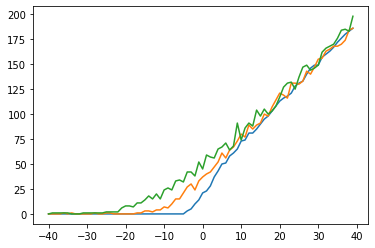

In [0]:
for sigma_v in [2, 6, 10]:
  rang = np.arange(-40, 40)
  rates = []
  for I in rang:
    _, _, firing_rate = integrate_with_euler(0, 1000.0, 0.1, sigma_v, I=I, V_th=V_th)
    rates.append(firing_rate)
  plt.plot(rang, rates)
plt.show()


In this model, the error doesn't affect the signal for high I.

c)



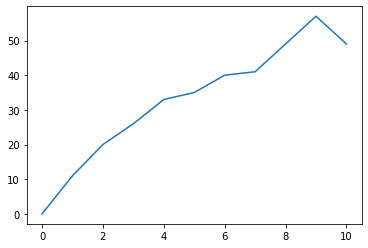

In [0]:
rates = []
rang = np.arange(11)
for sigma_v in rang:
  _, _, firing_rate = integrate_with_euler(0, 1000.0, 0.01, sigma_v, I=0, V_th=V_th)
  rates.append(firing_rate)
plt.plot(rang, rates)
plt.show()

The firing rate increases as the sigma_v increases even though the current is kept at 0. 